In [4]:
import pandas as pd
raw = pd.read_csv('./pyalgo_eikon_eod_data.csv',index_col=0,parse_dates=True).dropna()
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [6]:
data = pd.DataFrame(raw['EUR='])
data.rename(columns={"EUR=":"price"},inplace=True)
data['sma1'] = data['price'].rolling(42).mean()
data['sma2'] = data['price'].rolling(252).mean()
data.tail()

,price,sma1,sma2
Date,,,
2019-12-24,1.1087,1.107698,1.119630
2019-12-26,1.1096,1.107740,1.119529
2019-12-27,1.1175,1.107924,1.119428
2019-12-30,1.1197,1.108131,1.119333
2019-12-31,1.1210,1.108279,1.119231


In [8]:
from pylab import mpl,plt

In [10]:
plt.style.use("seaborn")
mpl.rcParams["savefig.dpi"] = 300
mpl.rcParams["font.family"] = "serif"


<AxesSubplot:title={'center':'EURUSD'}, xlabel='Date'>

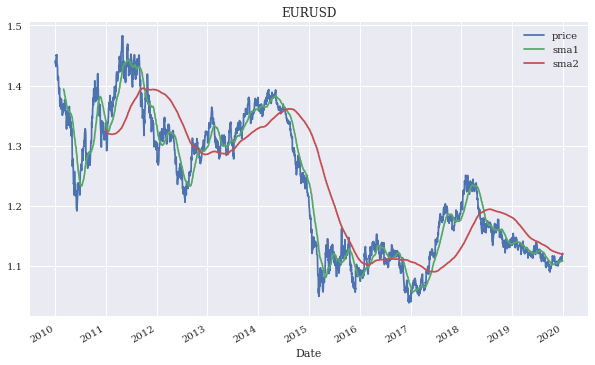

In [11]:
data.plot(title="EURUSD",figsize=(10,6))

In [13]:
import numpy as np

In [14]:
data["position"] = np.where(data["sma1"]>data["sma2"],1,-1)

In [15]:
data.dropna(inplace=True)

<AxesSubplot:title={'center':'aa'}, xlabel='Date'>

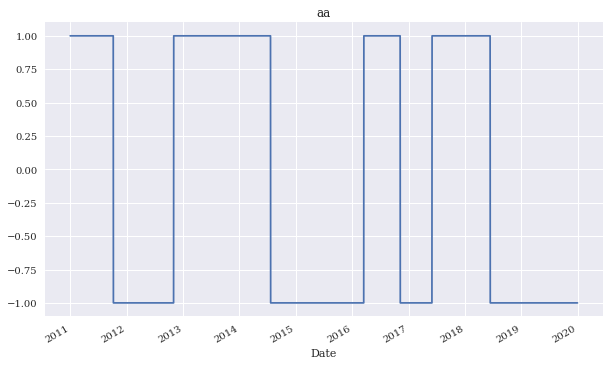

In [16]:
data["position"].plot(ylim=[-1.1,1.1],title="aa",figsize=(10,6))

In [17]:
data["return"] = np.log(data["price"]/data["price"].shift(1))

<AxesSubplot:>

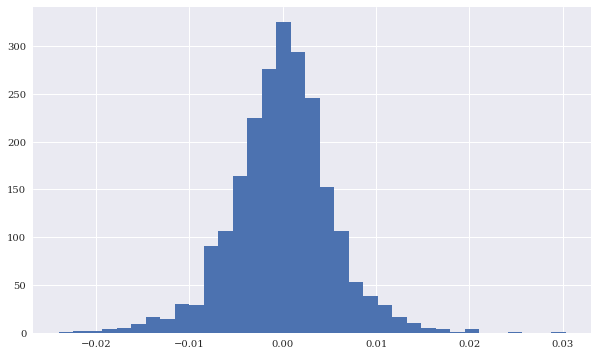

In [18]:
data["return"].hist(bins=35,figsize=(10,6))